In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings('ignore')


/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv


## Table of Contents

1. [About the dataset](#about-the-dataset)
2. [Business Objective](#business-objective)
3. [Analytical Questions](#analytical-questions)
4. [Understanding the Dataset](#understanding-dataset)

5. Answering Questions:
    - [Success Rate Over Time](#success-rate-over-time)
    - [Category and Main Category Analysis](#category-and-main-category-analysis)
    - [Goal Amount Analysis](#goal-amount-analysis)
    - [Geographical Analysis](#geographical-analysis)
    
    
6. [Conclusion](#conclusion)    

<div style="width: em; height: 3px; background-color: #FFF;"></div>



## About the dataset <a name="about-the-dataset"></a>

The dataset provides comprehensive information on Kickstarter projects, encompassing key details such as product categories, subcategories, country of origin, and financial aspects like funding goals, pledged amounts, and project success. Additionally, it includes chronological data, specifying the campaign's start and end dates. This dataset serves as a valuable resource for gaining insights into optimal funding goals, popular product categories, and other factors influencing project success.


## Business Objective <a name="business-objective"></a>

Optimize the overall success and sustainability of Kickstarter as a crowdfunding platform by guiding creators in setting realistic funding goals, enhancing backer engagement, expanding project reach globally, and improving the success rates of diverse projects.

## Analytical Questions <a name="analytical-questions"></a>

1. **Success Rate Over Time:**
    - How has the success rate of Kickstarter projects evolved over five years?
    - Are there certain months or seasons when projects are more likely to succeed?
    - Is there an optimal campaign duration for different categories?
    - Investigate whether the day of the week influences project success.

2. **Category and Main Category Analysis:**
    - Which categories and main categories have the highest success rates?
    - Analyze the distribution of successful and failed projects across different categories.

3. **Goal Amount Analysis:**
    - How much are backers willing to spend per project per category?
    - Is there an optimal range for goal amounts that maximizes success?
    - Analyze the relationship between goal amount and project success.

4. **Geographical Analysis:**
    -How have the countries been performing over years in terms of projects on the platform?
    -Which countries have the highest success rates for Kickstarter projects?


<div style="width: em; height: 3px; background-color: #FFF;"></div>

<h1>Understanding the Dataset <a name="understanding-dataset"></a>

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>We begin by scanning through the dataset to see what it countains...
    <h3>Taking account of all the columns present:</h3>

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/kickstarter-projects/ks-projects-201801.csv')

# Display the first few rows of the DataFrame 'df'
df.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>Checking the data types of all columns to see if anything needs improvement:</h3>

In [ ]:
# checking the data types of the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [ ]:
# converting launched and deadline columns in datetime format
df['deadline']=pd.to_datetime(df['deadline']).dt.date
df['launched']=pd.to_datetime(df['launched']).dt.date

In [ ]:
# Display information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>Checking, and eliminating Null Values</h3>

In [ ]:
# checking for null values
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [ ]:
# Select rows where the 'usd pledged' column contains NaN values
df[df['usd pledged'].isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06,235.00,undefined,0,"N,0""",NaN,235.00,5000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81


<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3> At first I thought the states of success were only 'Successful' and 'Failed'

In [ ]:
# checking unique states of success
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

<h3> The states were not binary. In this case, are the other values significant enough to generate any kind of insight?

In [ ]:
# checking number of values per state
df.groupby(by='state')['ID'].agg('count')

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

<h3>'Failed' and 'successful' were the two top values. For this notebook, I will consider only these two states.

In [ ]:
# checking number of rows with null usd pledged value per state
df[df['usd pledged'].isna()].groupby(by='state')['ID'].agg('count')

state
canceled        22
failed         105
live             1
successful     105
suspended        2
undefined     3562
Name: ID, dtype: int64

In [ ]:
# From above analysis,we observe that undefined state belongs to null usd pledged value. Also, for our analysis these rows won't be contributing anything and only consist of 1 % of the whole dataset. Hence, I am removing rows with usd pledged = Null

df_new=df[~df['usd pledged'].isna()]

<div style="width: em; height: 1px; background-color: #FFF;"></div>

In [ ]:
# Display information about the DataFrame 'df_new'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


<h4> Based on the analysis above, I noticed that instances where the state is undefined correspond to null values in the USD pledged column. These rows do not provide meaningful information for our analysis and constitute only 1% of the entire dataset. Consequently, I am opting to remove rows where the USD pledged value is null for the sake of our analysis. </h4>


<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>Checking, and eliminating Duplicates</h3>

In [ ]:
# checking for duplicates
df_new.duplicated().sum()

0

<h4>
No duplicate entries were identified in the dataset. The absence of duplicates confirms the integrity of the data, rendering it suitable for thorough analysis.</h4>

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3> Creating a cool color palette for this notebook

In [ ]:
# Define the hex colors
palette_colors = ['#D8A47F','#AE7D5C','#F3C7B2','#58A4B0','#387C8F','#8BD3E3'
,'#0C7C59','#07503A','#49A381'
,'#2B303A','#1E2229','#5E6670'
,'#D64933','#B23D28','#F2927A']

# Set the color palette for Seaborn
sns.set_palette(palette_colors)

<div style="width: em; height: 3px; background-color: #FFF;"></div>

<h1>Answering the Questions

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h1>1. Success Rate Over Time <a name="success-rate-over-time"></a>
<h3>a. How has the success rate of Kickstarter projects evolved over the years? (let’s take 5 years)</h3>

In [ ]:
# Convert 'launched' column to datetime type
df_new['launched'] = pd.to_datetime(df_new['launched'])

# Convert 'deadline' column to datetime type
df_new['deadline'] = pd.to_datetime(df_new['deadline'])

# Extract year, month, and day from 'launched' column and create new columns
df_new['launched_year'] = df_new['launched'].dt.year
df_new['launched_month']= df_new['launched'].dt.month
df_new['launched_day']=df_new['launched'].dt.day


In [ ]:
# Display the first few rows of the DataFrame 'df_new'
df_new.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,11
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,12
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,17
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,4


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374864 entries, 0 to 378660
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                374864 non-null  int64         
 1   name              374860 non-null  object        
 2   category          374864 non-null  object        
 3   main_category     374864 non-null  object        
 4   currency          374864 non-null  object        
 5   deadline          374864 non-null  datetime64[ns]
 6   goal              374864 non-null  float64       
 7   launched          374864 non-null  datetime64[ns]
 8   pledged           374864 non-null  float64       
 9   state             374864 non-null  object        
 10  backers           374864 non-null  int64         
 11  country           374864 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  374864 non-null  float64       
 14  usd_goal_

In [ ]:
# Create DataFrame 'df_category' for counting projects by 'main_category' and 'launched_year'
df_category = df_new.groupby(by=['main_category', 'launched_year'])['ID'].agg('count').reset_index()

# Create DataFrame 'df_category_success' for counting successful projects by 'main_category' and 'launched_year'
df_category_success = df_new[df_new['state']=='successful'].groupby(by=['main_category', 'launched_year'])['ID'].agg('count').reset_index()


In [ ]:
# Merge DataFrames 'df_category' and 'df_category_success' based on 'main_category' and 'launched_year'
df_category_success_rate = pd.merge(df_category, df_category_success, how='inner', left_on=['main_category', 'launched_year'], right_on=['main_category', 'launched_year'])


In [ ]:
# Calculate success rate and create a new column 'success_rate'
df_category_success_rate['success_rate'] = round((df_category_success_rate['ID_y'] / df_category_success_rate['ID_x']), 2)

# Display the resulting DataFrame 'df_category_success_rate'
df_category_success_rate


,main_category,launched_year,ID_x,ID_y,success_rate
0,Art,2009,169,77,0.46
1,Art,2010,856,382,0.45
2,Art,2011,2340,1189,0.51
3,Art,2012,3433,1694,0.49
4,Art,2013,3440,1684,0.49
...,...,...,...,...,...
130,Theater,2013,1475,963,0.65
131,Theater,2014,1803,1011,0.56
132,Theater,2015,1684,901,0.54
133,Theater,2016,1132,664,0.59


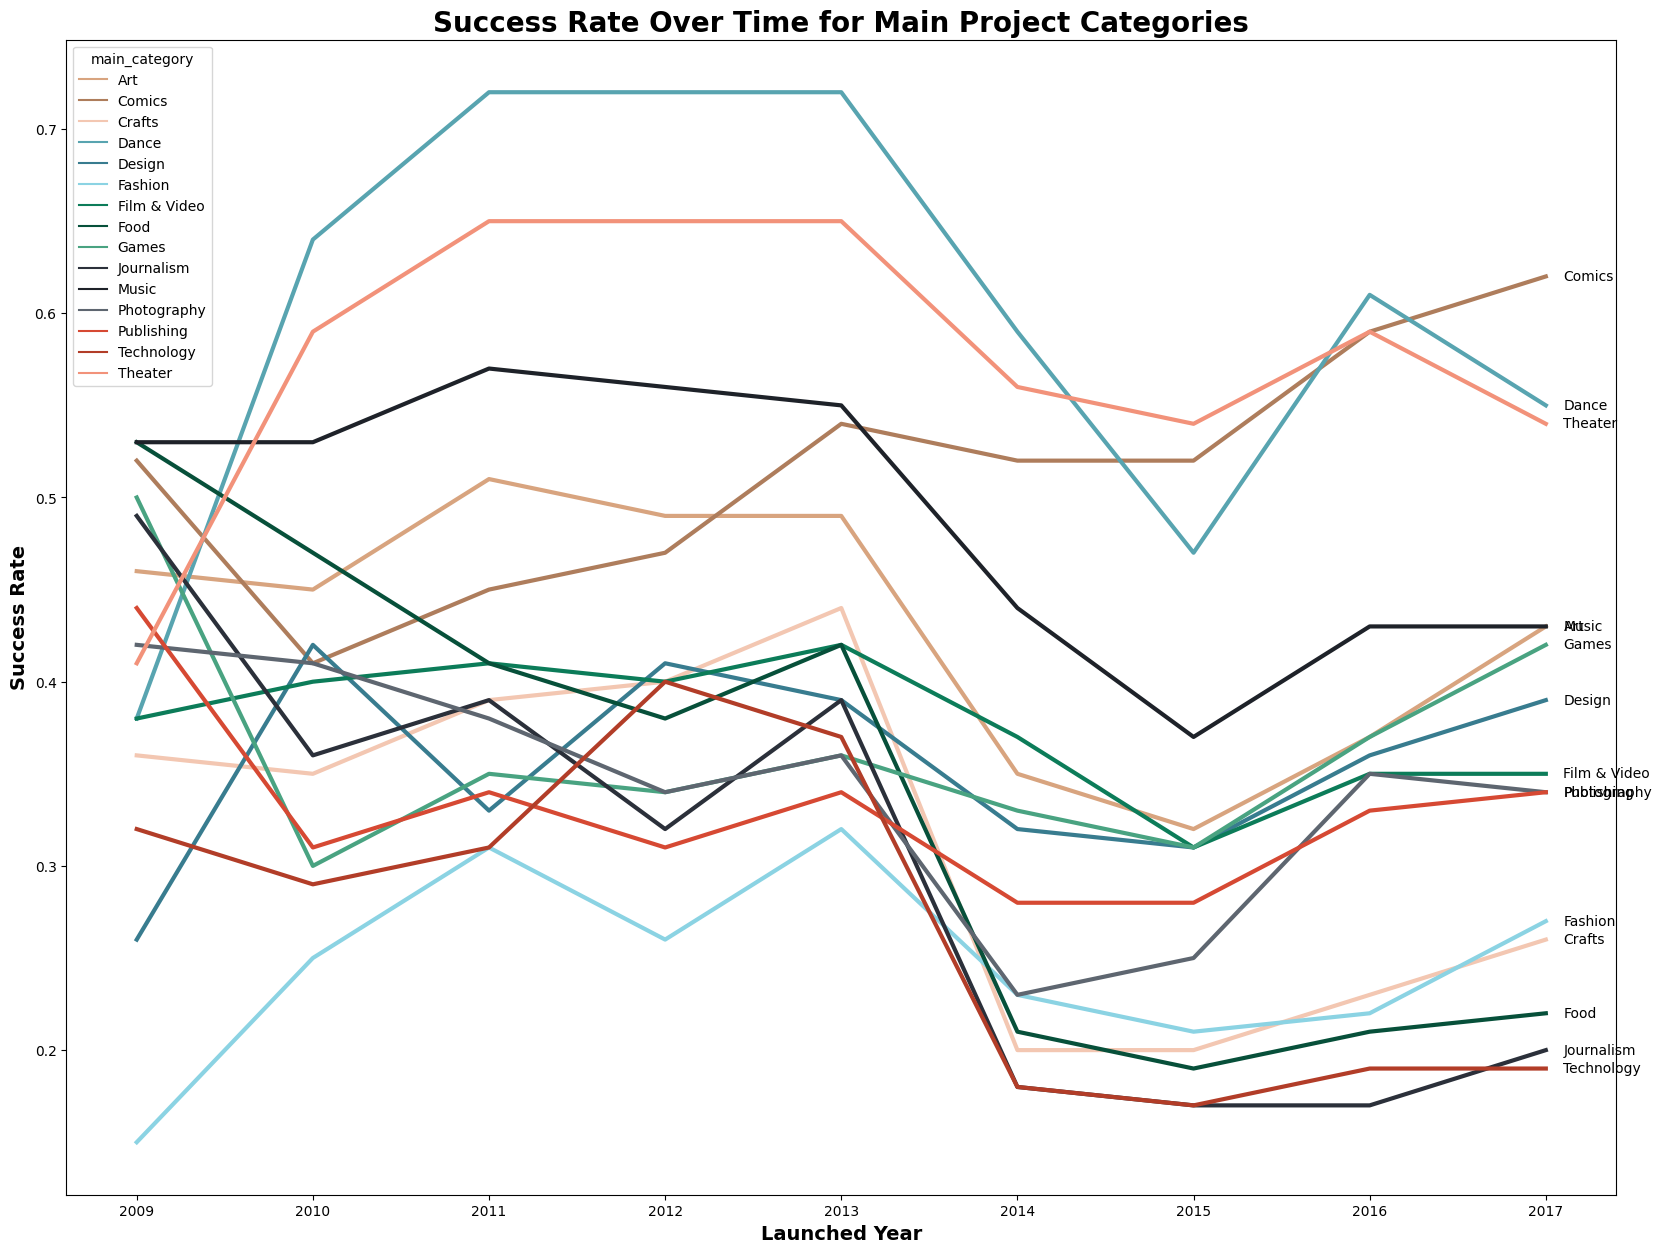

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to increase the height
plt.figure(figsize=(20, 15))  # Adjust the width and height as needed

# Create a line plot for 'success_rate' vs 'launched_year' with 'main_category' as hue
sns.lineplot(data=df_category_success_rate, y='success_rate', x='launched_year', hue='main_category', linewidth=3)

# Add 'main_category' as inline text on the line graph
for line in range(0, df_category_success_rate['main_category'].nunique()):
    plt.text(df_category_success_rate['launched_year'].max() + 0.1,  # Adjust the x-coordinate as needed
             df_category_success_rate[df_category_success_rate['main_category'] == df_category_success_rate['main_category'].unique()[line]]['success_rate'].iloc[-1],
             df_category_success_rate['main_category'].unique()[line],
             horizontalalignment='left', verticalalignment='center', fontsize=10
            )

# Set the titles for x-axis and y-axis
plt.title('Success Rate Over Time for Main Project Categories', fontsize=20, fontweight='bold')
plt.xlabel('Launched Year', fontsize=14, fontweight='bold')
plt.ylabel('Success Rate', fontsize=14, fontweight='bold')

# Show the plot
plt.show()



<h4>Insight: Success rates had peaked between 2011 and 2013 for most categories, with a slight rise in 2016. Comics are the only category that improved its success rate over the years, while Food had a constant decline.

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>b. Are there certain months or seasons when projects are more likely to succeed? (month data)</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [ ]:
#df_category=df_new.groupby(by=['main_category','launched_year'])['ID'].agg('count').reset_index()
df_category_success_mnth=df_new[df_new['state']=='successful'].groupby(by=['launched_year','launched_month'])['ID'].agg('count').reset_index()

In [ ]:
df_category_success_mnth.head()

,launched_year,launched_month,ID
0,2009,4,11
1,2009,5,30
2,2009,6,36
3,2009,7,32
4,2009,8,51


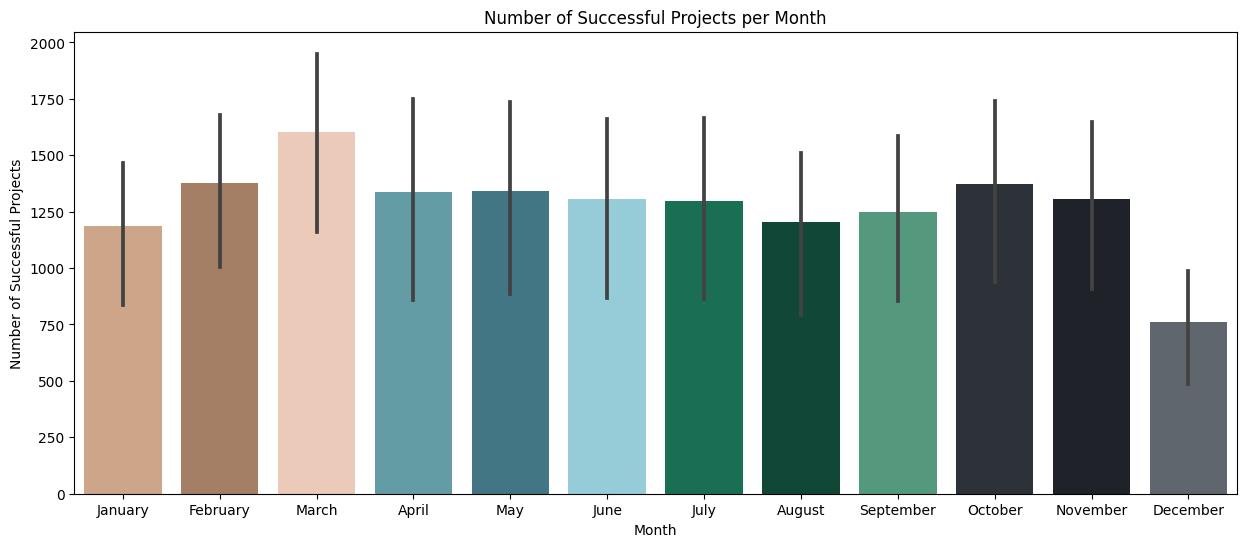

In [ ]:

# Assuming df_category_success_mnth is the DataFrame you created
plt.figure(figsize=(15, 6))

# Map month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_category_success_mnth['Month_Name'] = df_category_success_mnth['launched_month'].apply(lambda x: month_names[x - 1])

# Create a bar plot with proper month order
sns.barplot(data=df_category_success_mnth, x='Month_Name', y='ID', order=month_names, palette=palette_colors)
plt.xlabel('Month')
plt.ylabel('Number of Successful Projects')
plt.title('Number of Successful Projects per Month')
plt.show()



<h4>Insight: Product launches in March have done the best, and December the worst. The second best is October, so the likelihood of the project doing well would be in these months.

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>c. Is there an optimal campaign duration for different categories?</h3>

In [ ]:
# Calculate campaign duration in days and create a new column 'campaign_duration'
df_new['campaign_duration'] = (df_new['deadline'] - df_new['launched']).dt.days


In [ ]:
df_new

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,campaign_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,11,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,12,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,17,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,4,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17,25.0,canceled,1,US,25.0,25.0,50000.00,2014,9,17,30
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22,155.0,failed,5,US,155.0,155.0,1500.00,2011,6,22,27
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1,US,20.0,20.0,15000.00,2010,7,1,46
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6,US,200.0,200.0,15000.00,2016,1,13,31


In [ ]:
# Define a function to categorize campaign durations into buckets
def conditions(i):
    if i <= 30: return '0-30'
    if 30 < i <= 60: return '30-60'
    if 60 < i <= 90: return '60-90'
    if i > 90: return '>90'

# Apply the categorization function to create a new column 'campaign_duration_bucket'
df_new['campaign_duration_bucket'] = df_new['campaign_duration'].apply(conditions)

# Display the first few rows of the DataFrame with the new column
df_new.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,campaign_duration,campaign_duration_bucket
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,11,59,30-60
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2,60,30-60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,12,45,30-60
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,17,30,0-30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,4,56,30-60


In [ ]:
# Group DataFrame by 'main_category' and 'campaign_duration_bucket' and count the number of projects for each group
df_bucket_category = df_new.groupby(by=['main_category', 'campaign_duration_bucket'])['ID'].agg('count').reset_index()

# Filter DataFrame to include only successful projects, then group by 'main_category' and 'campaign_duration_bucket' and count the number of successful projects for each group
df_category_category_success = df_new[df_new['state'] == 'successful'].groupby(by=['main_category', 'campaign_duration_bucket'])['ID'].agg('count').reset_index()


In [ ]:
# Merge DataFrames df_bucket_category and df_category_category_success based on 'main_category' and 'campaign_duration_bucket'
df_category_bucket_success_rate = pd.merge(df_bucket_category, df_category_category_success, how='inner', left_on=['main_category', 'campaign_duration_bucket'], right_on=['main_category', 'campaign_duration_bucket'])

# Calculate success rate by dividing the count of successful projects by the total count of projects for each category and bucket
df_category_bucket_success_rate['success_rate'] = round((df_category_bucket_success_rate['ID_y'] / df_category_bucket_success_rate['ID_x']), 2)

# Display the DataFrame with success rates
df_category_bucket_success_rate


,main_category,campaign_duration_bucket,ID_x,ID_y,success_rate
0,Art,0-30,19279,8262,0.43
1,Art,30-60,8461,3082,0.36
2,Art,60-90,390,160,0.41
3,Art,>90,23,6,0.26
4,Comics,0-30,6761,3887,0.57
5,Comics,30-60,3894,1898,0.49
6,Comics,60-90,151,51,0.34
7,Comics,>90,13,6,0.46
8,Crafts,0-30,6736,1681,0.25
9,Crafts,30-60,2048,427,0.21


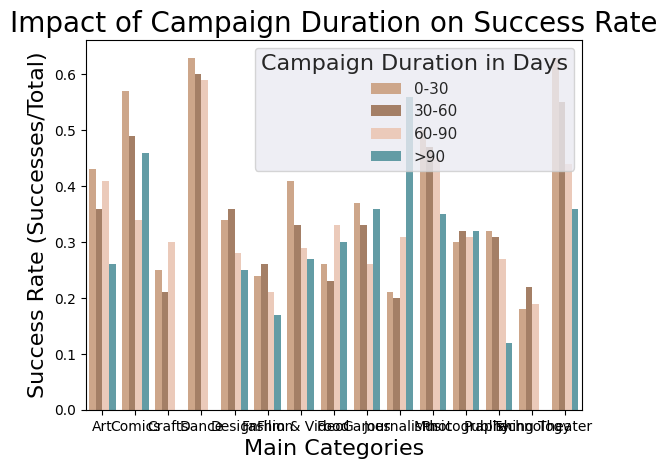

In [ ]:
# Create a bar plot using seaborn to visualize success rates based on 'main_category', 'campaign_duration_bucket', and 'success_rate'
sns.barplot(data=df_category_bucket_success_rate, y='success_rate', x='main_category', hue='campaign_duration_bucket', palette=palette_colors)

# Set the size of the plot figure
sns.set(rc={'figure.figsize': (25, 12)})

# Add title and labels
plt.title('Impact of Campaign Duration on Success Rate', fontsize=20)
plt.xlabel('Main Categories', fontsize=16)
plt.ylabel('Success Rate (Successes/Total)', fontsize=16)

# Add title to the campaign duration bucket
plt.legend(title='Campaign Duration in Days', title_fontsize='16')


# Show the plot
plt.show()


<h4> Insight: For most categories, a shorter duration (0-30) days yields better results.

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>d. Investigate whether day of week for project launch influences how well it does.

In [ ]:
# Assuming df_new is your DataFrame
df_new['launched'] = pd.to_datetime(df_new['launched'])

# Create a new column 'day_of_week' to store the day of the week
df_new['day_of_week'] = df_new['launched'].dt.day_name()

# Display the DataFrame with the new 'day_of_week' column
print(df_new[['launched', 'day_of_week']].head())

    launched day_of_week
0 2015-08-11     Tuesday
1 2017-09-02    Saturday
2 2013-01-12    Saturday
3 2012-03-17    Saturday
4 2015-07-04    Saturday


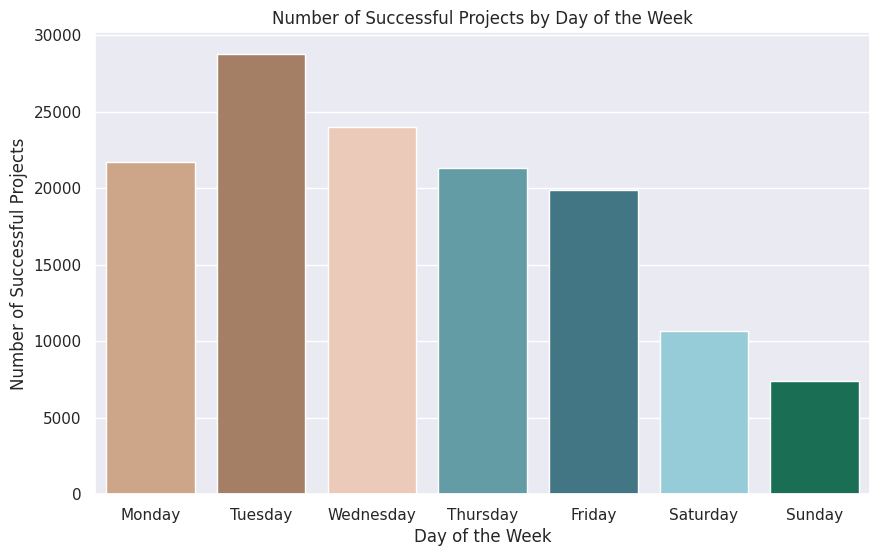

In [ ]:
# Assuming df_new is your DataFrame
df_new['launched'] = pd.to_datetime(df_new['launched'])
df_new['day_of_week'] = df_new['launched'].dt.day_name()

# Filter DataFrame to include only successful projects
df_successful = df_new[df_new['state'] == 'successful']


# Create a countplot with the specified color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=df_successful, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=palette_colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Successful Projects')
plt.title('Number of Successful Projects by Day of the Week')
plt.show()


<h4>Insight: Projects demonstrate higher success rates when initiated on Tuesdays, whereas they tend to underperform when launched on Sundays.

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h2>2. Category and Main Category Analysis:</h2><a name="category-and-main-category-analysis"></a>
<h3>a. Which categories and main categories have the highest success rates?</h3>

In [ ]:
# Group DataFrame by 'main_category' and 'category' and count the number of projects for each group
df_category = df_new.groupby(by=['main_category', 'category'])['ID'].agg('count').reset_index()

# Filter DataFrame to include only successful projects, then group by 'main_category' and 'category' and count the number of successful projects for each group
df_category_success = df_new[df_new['state'] == 'successful'].groupby(by=['main_category', 'category'])['ID'].agg('count').reset_index()


In [ ]:
# Merge DataFrames df_category and df_category_success based on 'main_category' and 'category'
df_category_success_rate = pd.merge(df_category, df_category_success, how='inner', left_on=['main_category', 'category'], right_on=['main_category', 'category'])


In [ ]:
# Merge DataFrames df_category and df_category_success based on 'main_category' and 'category'
df_category_success_rate = pd.merge(df_category, df_category_success, how='inner', left_on=['main_category', 'category'], right_on=['main_category', 'category'])

# Calculate success rate by dividing the count of successful projects by the total count of projects for each category
df_category_success_rate['success_rate'] = round((df_category_success_rate['ID_y'] / df_category_success_rate['ID_x']), 2)

# Display the DataFrame with success rates
df_category_success_rate


,main_category,category,ID_x,ID_y,success_rate
0,Art,Art,8253,3385,0.41
1,Art,Ceramics,305,132,0.43
2,Art,Conceptual Art,1030,366,0.36
3,Art,Digital Art,1346,371,0.28
4,Art,Illustration,3175,1626,0.51
...,...,...,...,...,...
165,Theater,Immersive,330,169,0.51
166,Theater,Musical,913,462,0.51
167,Theater,Plays,1378,804,0.58
168,Theater,Spaces,213,99,0.46


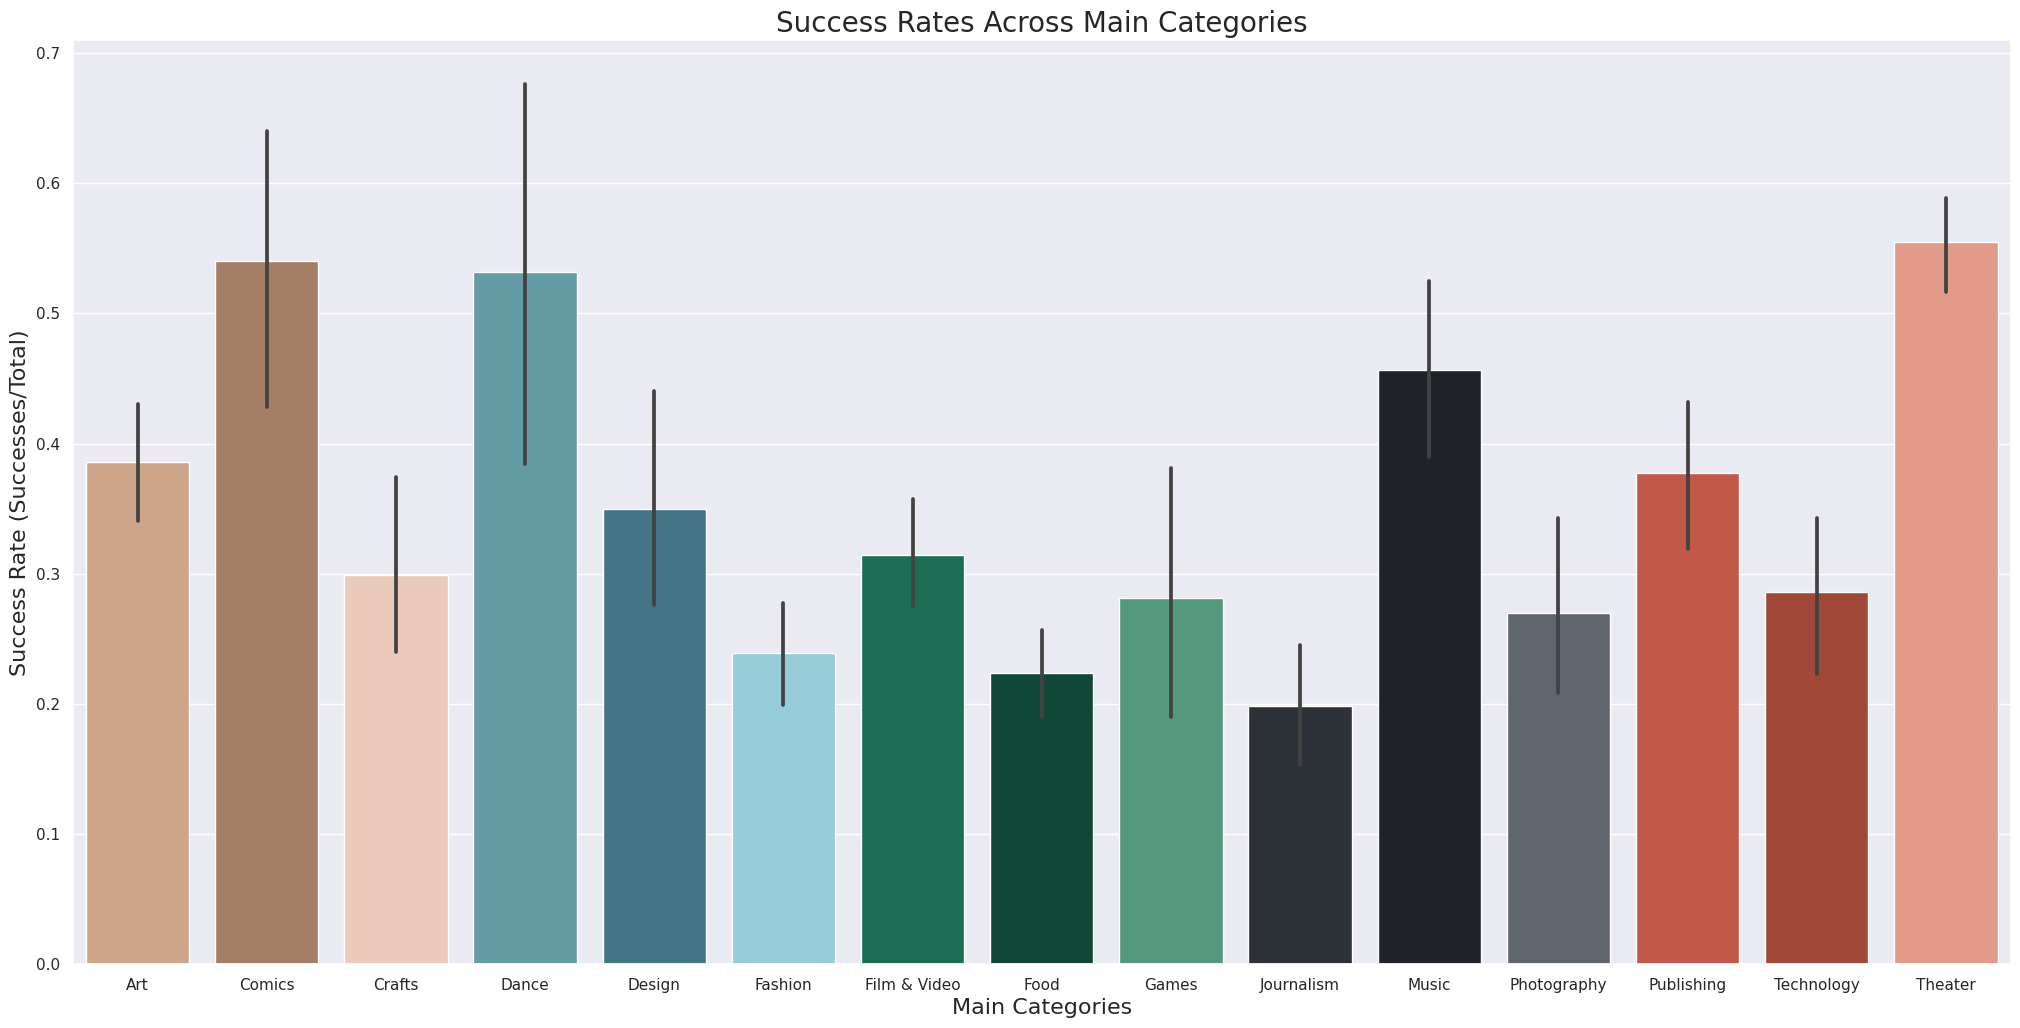

In [ ]:
# Create a bar plot using seaborn to visualize success rates based on 'main_category' and 'success_rate'
# The 'palette' parameter is added to specify color mapping
sns.barplot(data=df_category_success_rate, y='success_rate', x='main_category', palette=palette_colors)

# Set the size of the plot figure
sns.set(rc={'figure.figsize': (25, 12)})

# Add title and labels
plt.title('Success Rates Across Main Categories', fontsize=20)
plt.xlabel('Main Categories', fontsize=16)
plt.ylabel('Success Rate (Successes/Total)', fontsize=16)

# Show the plot
plt.show()



<h4> Insight: Comics, Dance and Theater have the most successful projects. Journalism, fashion and food are the least successful categories.

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3>b. Analyze the distribution of successful and failed projects across different categories.</h3>

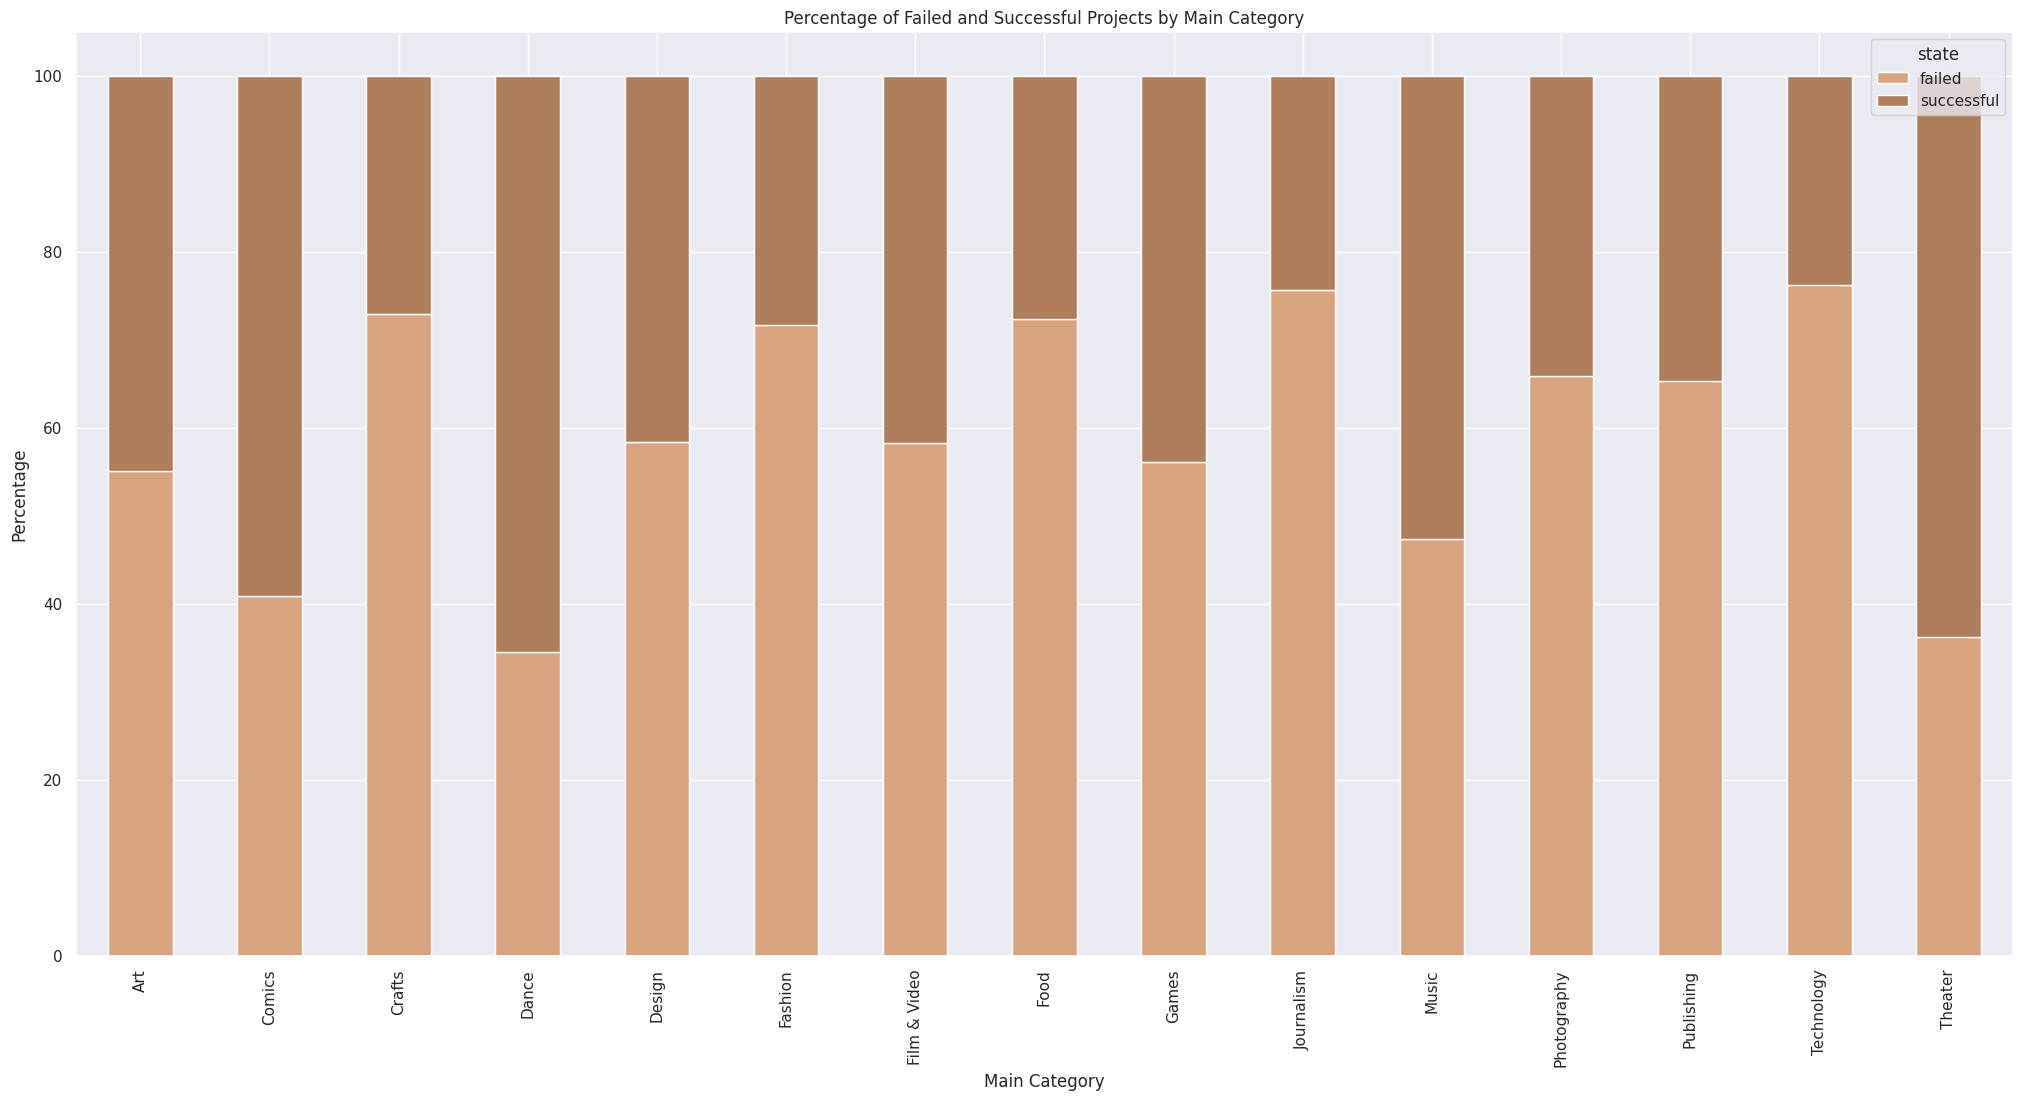

In [ ]:
# Filter DataFrame to include only 'failed' and 'successful' states
df_cat = df_new[df_new['state'].isin(['failed', 'successful'])]

# Calculate the percentage of 'failed' and 'successful' projects for each main category
df_percentage = df_cat.groupby(['main_category', 'state']).size().unstack('state', fill_value=0)
df_percentage = df_percentage.div(df_percentage.sum(axis=1), axis=0) * 100

# Plot a stacked percentage bar plot with the specified color palette
df_percentage.plot(kind='bar', stacked=True, figsize=(25, 12), color=palette_colors)
plt.title('Percentage of Failed and Successful Projects by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Percentage')
plt.show()


<h4>Insight: Comics, Music, Dance and Theatre have a higher success % than others. This could be a valuable insight to give to new users looking for inspiration

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h2>Goal Amount Analysis:</h2><a name="goal-amount-analysis"></a>

<h4>a.i. How much are backers willing to spend per project per category?</h4>

In [ ]:
# Display the first 10 rows of the DataFrame df_new
df_new.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,campaign_duration,campaign_duration_bucket,day_of_week
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,...,GB,0.00,0.00,1533.95,2015,8,11,59,30-60,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,...,US,100.00,2421.00,30000.00,2017,9,2,60,30-60,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,...,US,220.00,220.00,45000.00,2013,1,12,45,30-60,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,...,US,1.00,1.00,5000.00,2012,3,17,30,0-30,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,...,US,1283.00,1283.00,19500.00,2015,7,4,56,30-60,Saturday
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,...,US,52375.00,52375.00,50000.00,2016,2,26,35,30-60,Friday
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,...,US,1205.00,1205.00,1000.00,2014,12,1,20,0-30,Monday
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,...,US,453.00,453.00,25000.00,2016,2,1,45,30-60,Monday
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,...,US,8233.00,8233.00,125000.00,2014,4,24,35,30-60,Thursday
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,...,US,6240.57,6240.57,65000.00,2014,7,11,30,0-30,Friday


In [ ]:
# Group DataFrame by 'main_category' and calculate the sum of 'usd_pledged_real' and 'backers' for each category
df_backer_category = df_new.groupby('main_category')[['usd_pledged_real', 'backers']].agg(sum).reset_index()

# Display the first 5 rows of the DataFrame df_backer_category
df_backer_category.head()


,main_category,usd_pledged_real,backers
0,Art,9.068045e+07,1188200
1,Comics,7.151839e+07,1458090
2,Crafts,1.438428e+07,240342
3,Dance,1.301050e+07,161275
4,Design,7.342065e+08,7255880


In [ ]:
# Calculate the average pledge per backer by dividing 'usd_pledged_real' by 'backers' and rounding to 2 decimal places
df_backer_category['avg_pledge_per_backer'] = round(df_backer_category['usd_pledged_real'] / df_backer_category['backers'], 2)


<Axes: xlabel='main_category', ylabel='avg_pledge_per_backer'>

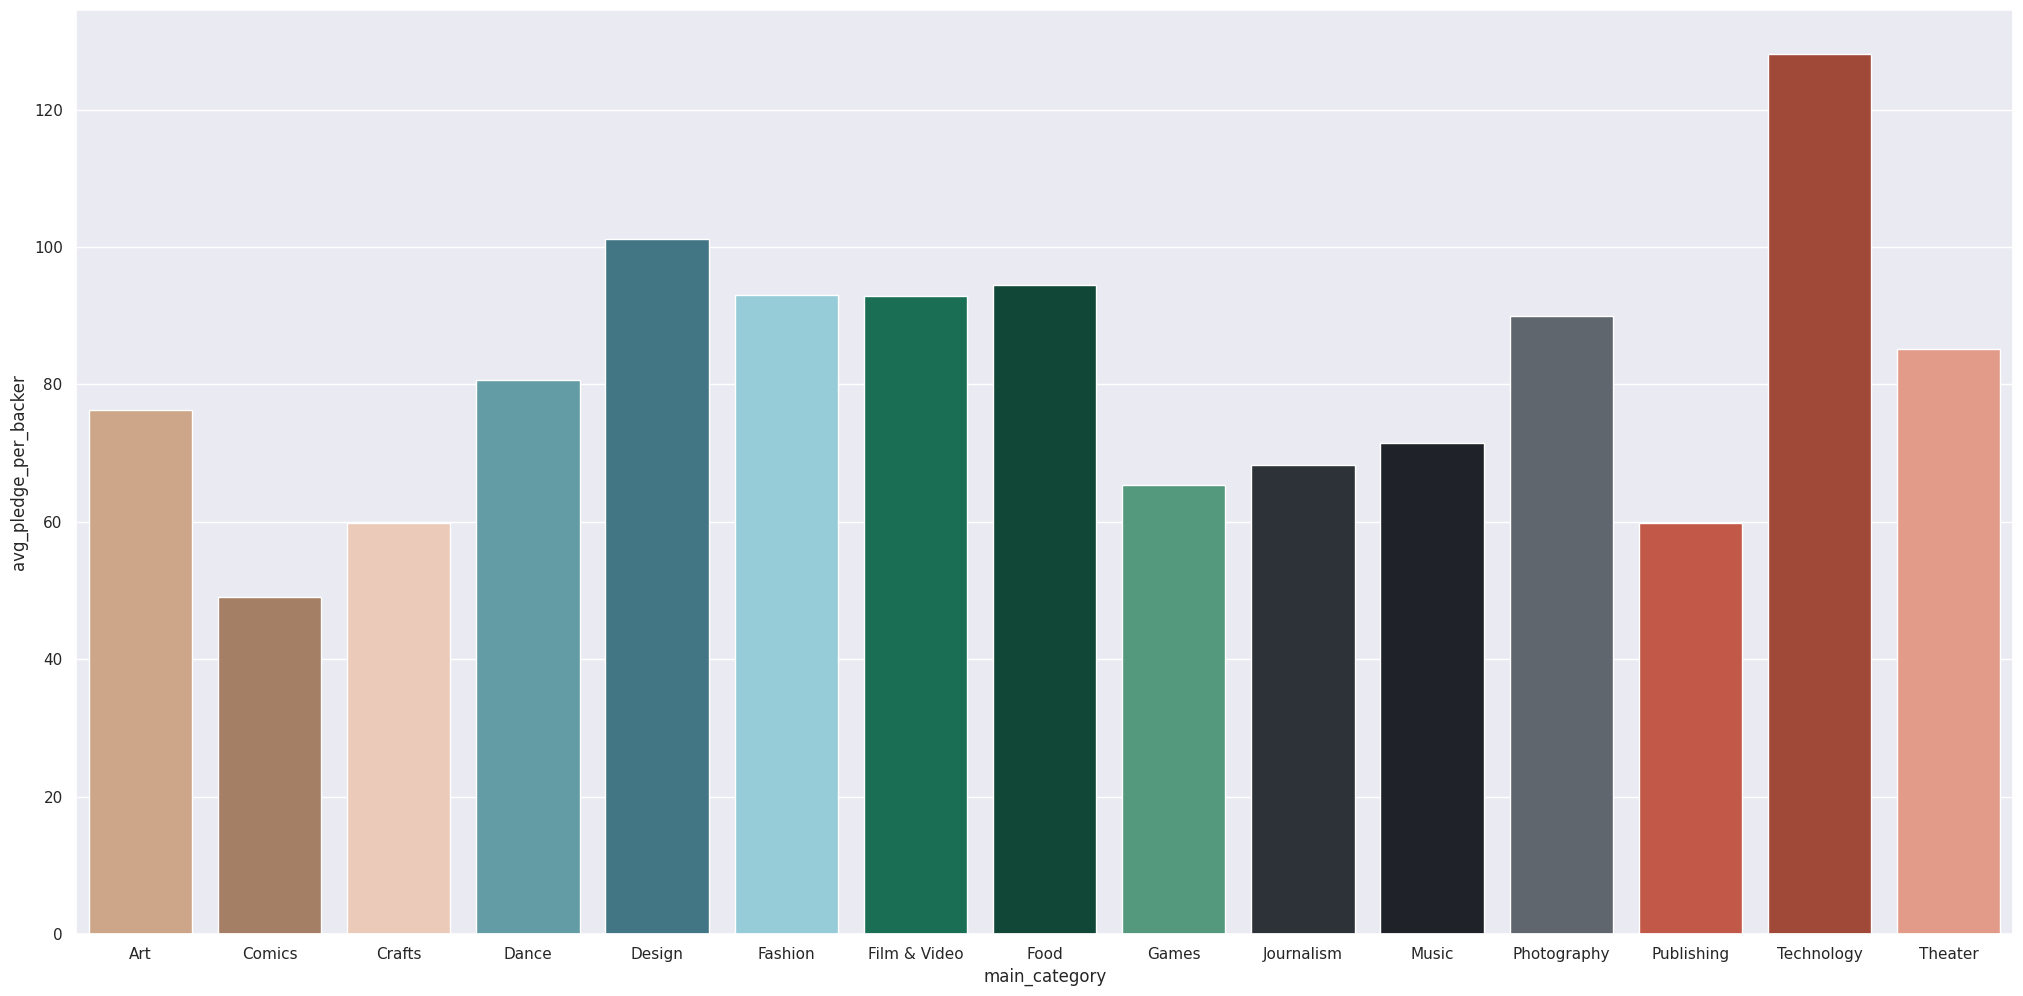

In [ ]:
# Create a bar plot using seaborn to visualize the average pledge per backer for each main category
sns.barplot(data=df_backer_category, x='main_category', y='avg_pledge_per_backer', palette=palette_colors)


<h4>A backer would be willing to spend the most on Technology and the least on Comics
It would be best to price products in these categories according to this graph

<h4>a.ii. Per category minimum and maximum a backer is willing to pay</h4>

In [ ]:
# Create a new DataFrame df_new_successful containing only successful projects
df_new_successful = df_new[df_new['state'] == 'successful']

# Calculate the average per backer and round to 2 decimal places, considering only cases where 'backers' > 0
df_new_successful.loc[df_new_successful['backers'] > 0, 'avg_per_backer'] = round(df_new_successful['usd_pledged_real'] / df_new_successful['backers'], 2)

# Fill any NaN values in the 'avg_per_backer' column with 0
df_new_successful['avg_per_backer'] = df_new_successful['avg_per_backer'].fillna(0)


In [ ]:
# Group DataFrame by 'main_category' and calculate the maximum and minimum average per backer for each category
df_pledge_backer_category = df_new_successful.groupby('main_category')[['avg_per_backer']].agg([max, min]).reset_index()

# Display the first 5 rows of the DataFrame df_pledge_backer_category
df_pledge_backer_category.head()


main_category avg_per_backer      
                           max   min
0           Art        3900.00  1.00
1        Comics         665.18  1.00
2        Crafts        1433.53  1.00
3         Dance        2377.50  7.00
4        Design        5639.86  0.78

In [ ]:
df_new_successful.describe()

,ID,deadline,goal,launched,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,campaign_duration,avg_per_backer
count,1.338510e+05,133851,1.338510e+05,133851,1.338510e+05,133851.000000,1.338510e+05,1.338510e+05,1.338510e+05,133851.000000,133851.000000,133851.000000,133851.000000,133851.000000
mean,1.073765e+09,2014-07-31 02:10:05.311876608,1.016611e+04,2014-06-28 22:24:24.786964736,2.409439e+04,264.128397,1.735603e+04,2.266449e+04,9.535702e+03,2014.005536,6.376127,15.116660,32.156719,91.122495
min,2.110900e+04,2009-05-03 00:00:00,1.000000e-02,2009-04-24 00:00:00,1.000000e+00,1.000000,0.000000e+00,7.900000e-01,1.000000e-02,2009.000000,1.000000,1.000000,1.000000,0.780000
25%,5.354180e+08,2012-12-13 00:00:00,1.250000e+03,2012-11-13 00:00:00,1.975000e+03,33.000000,1.162000e+03,2.000000e+03,1.300000e+03,2012.000000,4.000000,7.000000,30.000000,41.180000
50%,1.076740e+09,2014-08-28 00:00:00,3.925000e+03,2014-07-29 00:00:00,5.118000e+03,71.000000,3.655660e+03,5.109000e+03,3.840000e+03,2014.000000,6.000000,15.000000,30.000000,63.310000
75%,1.608195e+09,2016-04-11 00:00:00,1.000000e+04,2016-03-11 00:00:00,1.345200e+04,168.000000,1.042600e+04,1.324147e+04,1.000000e+04,2016.000000,9.000000,23.000000,34.000000,102.170000
max,2.147476e+09,2018-01-02 00:00:00,2.000000e+06,2017-12-29 00:00:00,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06,2017.000000,12.000000,31.000000,92.000000,10000.000000
std,6.191871e+08,NaN,3.125570e+04,NaN,1.583557e+05,1505.152003,1.301228e+05,1.509631e+05,2.796708e+04,2.027633,3.306995,8.848591,11.772305,125.527238


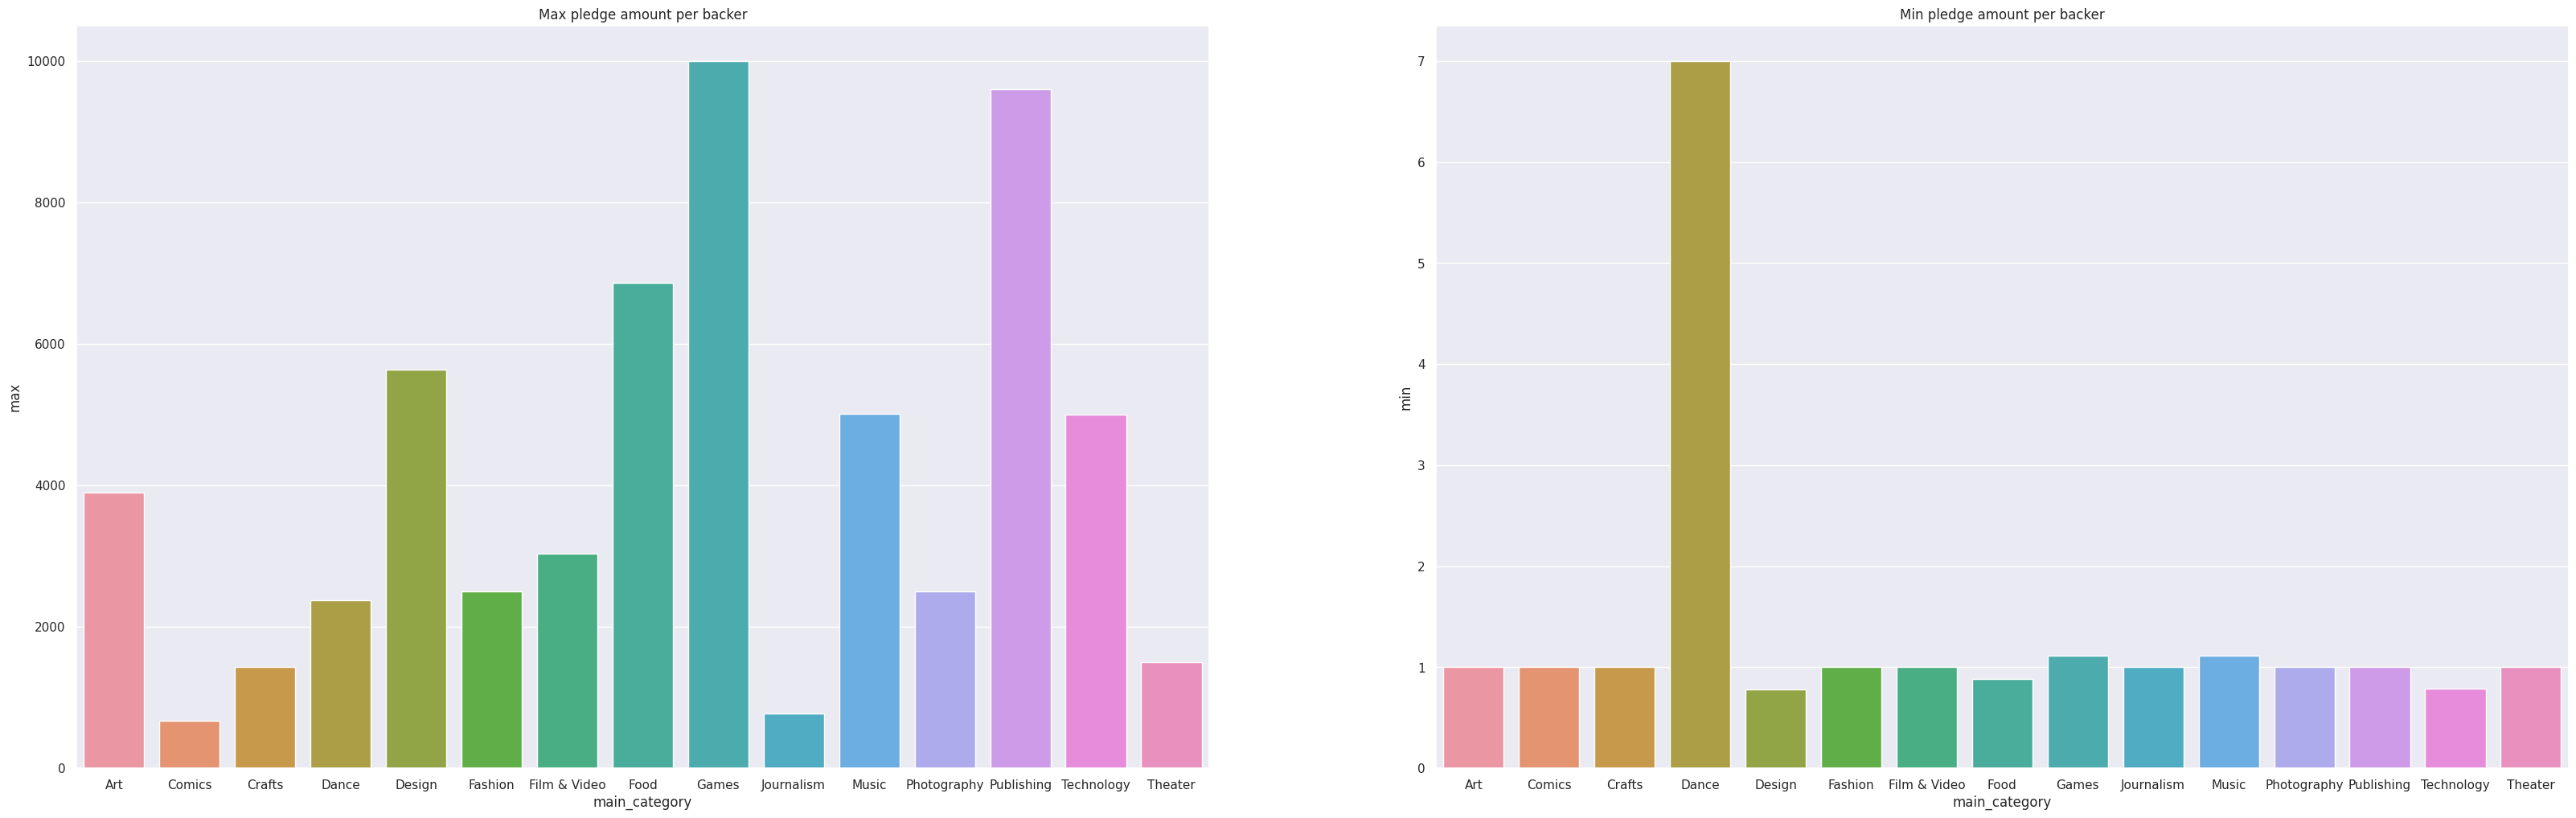

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 12))

# Plot the first graph on the left subplot
sns.barplot(x='main_category', y=df_pledge_backer_category['avg_per_backer']['max'], data=df_pledge_backer_category, ax=axes[0])
#sns.set(rc={'figure.figsize':(25,12)})
axes[0].set_title('Max pledge amount per backer')

# Plot the second graph on the right subplot
sns.barplot(x='main_category', y=df_pledge_backer_category['avg_per_backer']['min'], data=df_pledge_backer_category, ax=axes[1])
#sns.set(rc={'figure.figsize':(25,12)})
axes[1].set_title('Min pledge amount per backer')

# Adjust layout for better spacing
#plt.tight_layout()

# Show the plots
plt.show()


<h4> Insight: In successful projects, the highest a backer has ever paid is for a Game, and then Publishing!

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h2>4. Geographical Data Analysis <a name="geographical-analysis"></a>

<h3>a. How have different countries performed over the last 5 years?

In [ ]:

unique_countries = df_new['country'].unique()

# Print the unique country values
print(unique_countries)


['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NL' 'NZ'
 'CH' 'AT' 'DK' 'BE' 'HK' 'LU' 'SG' 'JP']


In [ ]:
# Dictionary mapping country codes to country names
country_code_mapping = {
    'GB': 'United Kingdom',
    'US': 'United States',
    'CA': 'Canada',
    'AU': 'Australia',
    'NO': 'Norway',
    'IT': 'Italy',
    'DE': 'Germany',
    'IE': 'Ireland',
    'MX': 'Mexico',
    'ES': 'Spain',
    'SE': 'Sweden',
    'FR': 'France',
    'NL': 'Netherlands',
    'NZ': 'New Zealand',
    'CH': 'Switzerland',
    'AT': 'Austria',
    'DK': 'Denmark',
    'BE': 'Belgium',
    'HK': 'Hong Kong',
    'LU': 'Luxembourg',
    'SG': 'Singapore',
    'JP': 'Japan'
}

# Create a new column 'country_name' based on the mapping
df_new['country_name'] = df_new['country'].map(country_code_mapping)

# Print the DataFrame with the new 'country_name' column
print(df_new[['country', 'country_name']])


       country    country_name
0           GB  United Kingdom
1           US   United States
2           US   United States
3           US   United States
4           US   United States
...        ...             ...
378656      US   United States
378657      US   United States
378658      US   United States
378659      US   United States
378660      US   United States

[374864 rows x 2 columns]


<div style="width: em; height: 3px; background-color: #FFF;"></div>

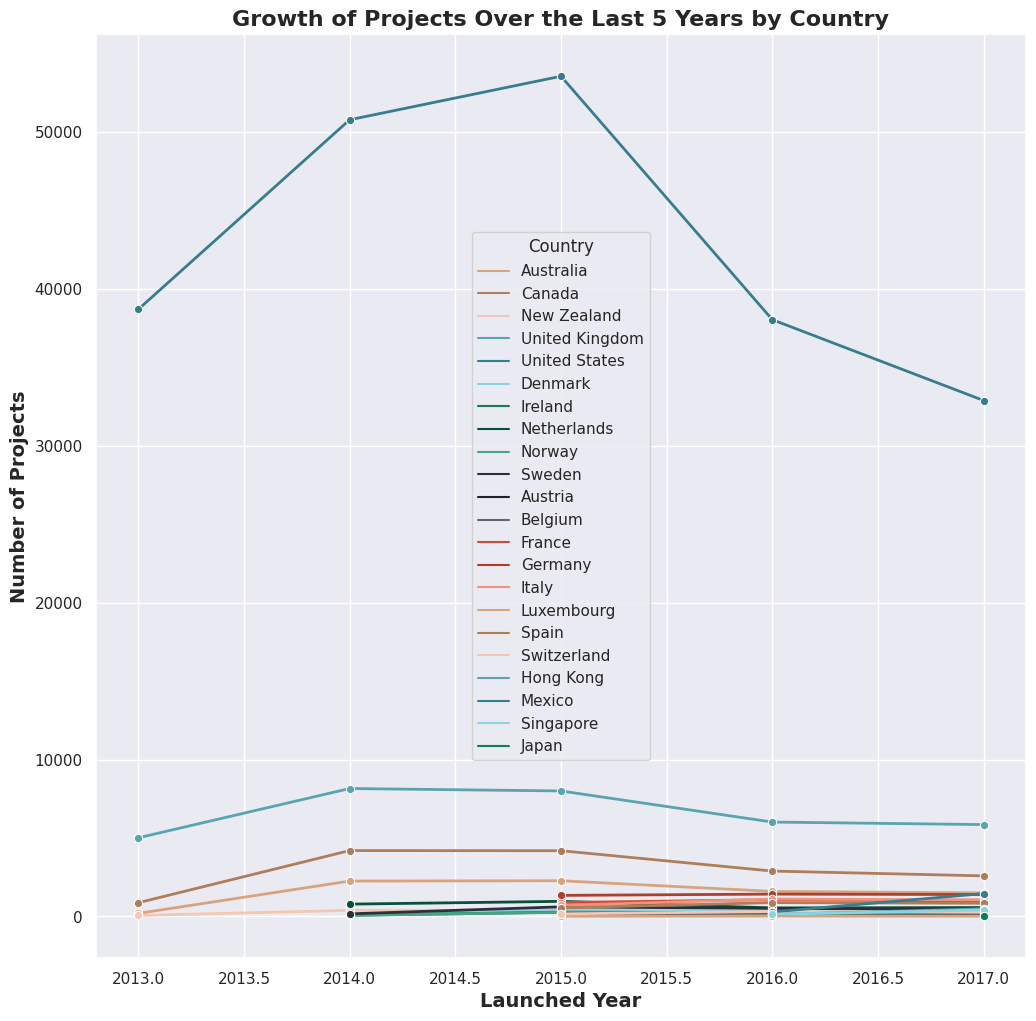

In [ ]:

# Filter DataFrame for the last 5 years (2014-2018)
df_last_5_years = df_new[df_new['launched_year'].between(2013, 2017)]

# Set the figure size
plt.figure(figsize=(12, 12))

# Create a line plot for the count of projects vs 'launched_year' with 'country_name' as hue
sns.lineplot(data=df_last_5_years.groupby(['launched_year', 'country_name']).size().reset_index(name='project_count'),
             x='launched_year', y='project_count', hue='country_name', marker='o', linewidth=2, palette=palette_colors)

# Set the titles for x-axis and y-axis
plt.title('Growth of Projects Over the Last 5 Years by Country', fontsize=16, fontweight='bold')
plt.xlabel('Launched Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Projects', fontsize=14, fontweight='bold')

# Show the legend
plt.legend(title='Country', title_fontsize='12')

# Show the plot
plt.grid(True)
plt.show()


<h4>  By excluding the United States & UK from the graph, we can gain a clearer understanding of the growth patterns of projects in other countries. This exclusion is particularly valuable as the significant volume of U.S. projects tends to dominate the visual representation, potentially overshadowing the dynamics in other regions.

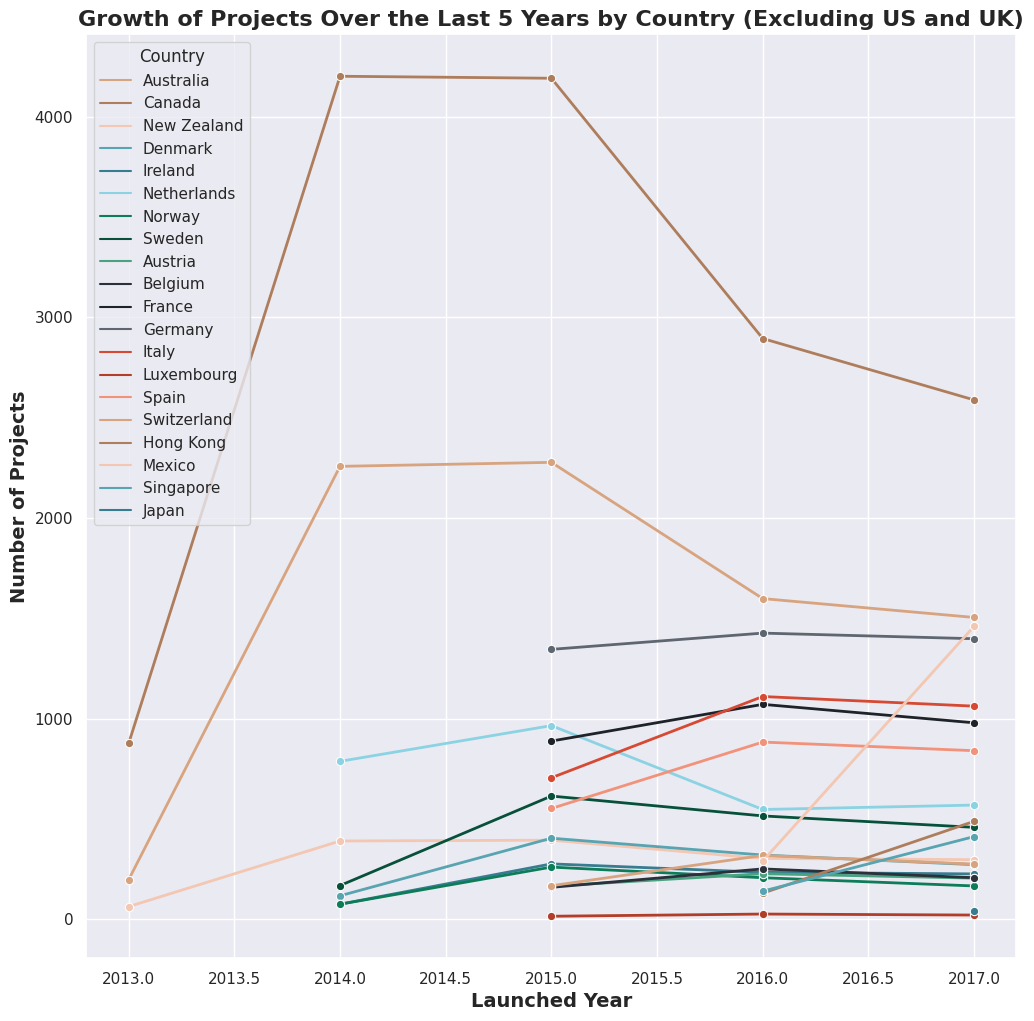

In [ ]:
# Filter DataFrame for the last 5 years (2014-2018) excluding the United States and the United Kingdom
excluded_countries = ['United States', 'United Kingdom']
df_last_5_years_no_us_uk = df_last_5_years[~df_last_5_years['country_name'].isin(excluded_countries)]

# Set the figure size
plt.figure(figsize=(12, 12))

# Create a line plot for the count of projects vs 'launched_year' with 'country_name' as hue
sns.lineplot(data=df_last_5_years_no_us_uk.groupby(['launched_year', 'country_name']).size().reset_index(name='project_count'),
             x='launched_year', y='project_count', hue='country_name', marker='o', linewidth=2, palette=palette_colors)

# Set the titles for x-axis and y-axis
plt.title('Growth of Projects Over the Last 5 Years by Country (Excluding US and UK)', fontsize=16, fontweight='bold')
plt.xlabel('Launched Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Projects', fontsize=14, fontweight='bold')

# Show the legend
plt.legend(title='Country', title_fontsize='12')

# Show the plot
plt.grid(True)
plt.show()


<h4> Insight: The performance of Kickstarter exhibited a discernible decline across various countries during the analyzed period, with some regions experiencing a plateau in the number of projects.

<div style="width: em; height: 1px; background-color: #FFF;"></div>

<h3> b. What is the distribution of successful projects across different countries?

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374864 entries, 0 to 378660
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID                        374864 non-null  int64         
 1   name                      374860 non-null  object        
 2   category                  374864 non-null  object        
 3   main_category             374864 non-null  object        
 4   currency                  374864 non-null  object        
 5   deadline                  374864 non-null  datetime64[ns]
 6   goal                      374864 non-null  float64       
 7   launched                  374864 non-null  datetime64[ns]
 8   pledged                   374864 non-null  float64       
 9   state                     374864 non-null  object        
 10  backers                   374864 non-null  int64         
 11  country                   374864 non-null  object        
 12  usd ple

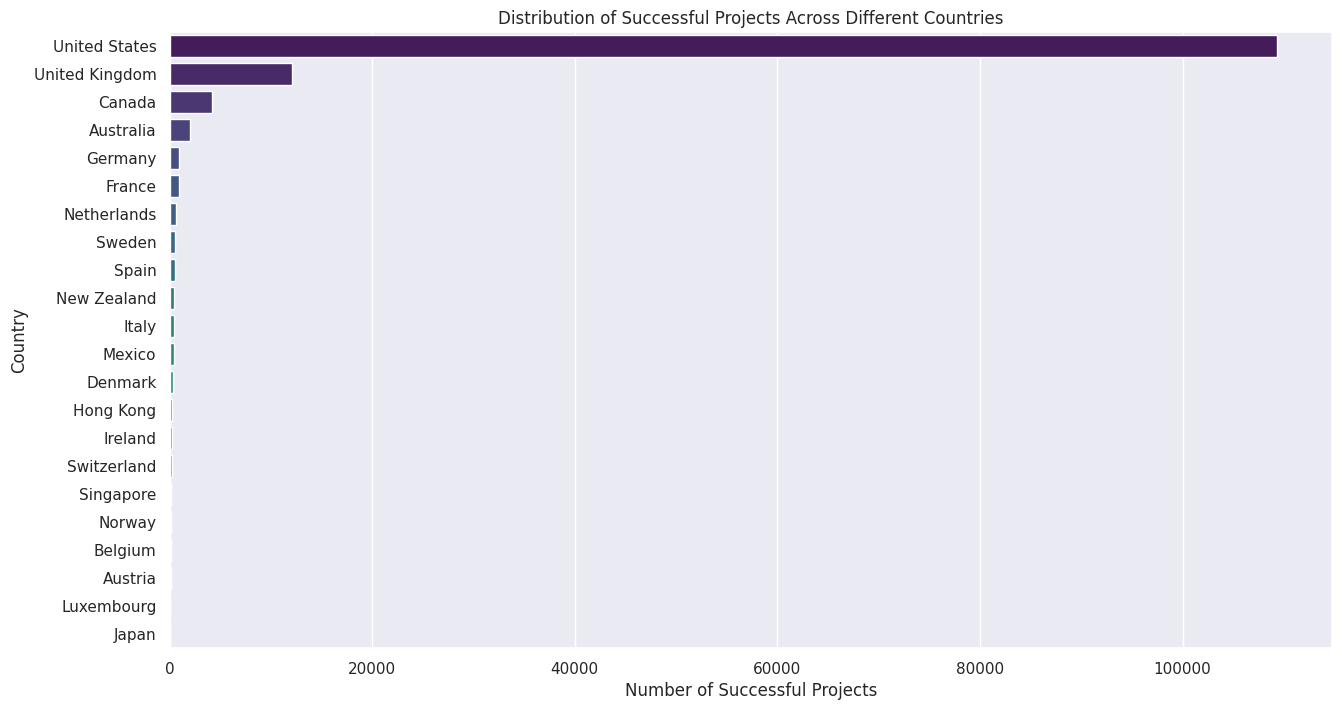

In [ ]:
# Filter DataFrame to include only successful projects
df_successful = df_new[df_new['state'] == 'successful']

# Count the number of successful projects by country
df_success_by_country = df_successful['country_name'].value_counts().reset_index()

# Rename columns for clarity
df_success_by_country.columns = ['Country', 'Number of Successful Projects']

# Sort the DataFrame by the number of successful projects
df_success_by_country = df_success_by_country.sort_values(by='Number of Successful Projects', ascending=False)

# Plot a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=df_success_by_country, x='Number of Successful Projects', y='Country', palette='viridis')
plt.title('Distribution of Successful Projects Across Different Countries')
plt.xlabel('Number of Successful Projects')
plt.ylabel('Country')
plt.show()


<h4>Insight: While the United States dominates in successful Kickstarter projects, there is a significant opportunity for other countries to catch up and enhance their presence on the platform.

<div style="width: em; height: 3px; background-color: #FFF;"></div>

# **Conclusion<u><a name="conclusion"></a></u>**


# **Insights for Users:**

1. **Best Posting Times:**
   - March is the most favorable time to post a project.
   - February and October are also good choices.
   - December is the least effective time to post.
   

2. **Optimal Day for Posting:**
   - Projects posted on Tuesdays tend to perform better than on other days.
   

3. **Campaign Duration:**
   - Keeping campaign duration under 30 days maximizes impact.
   

4. **Top Categories for Success:**
   - Comics, Music, Dance, and Theatre categories have higher success percentages.
   - Valuable inspiration for users seeking successful project ideas.
   

5. **Category-specific Pledge Insights:**
   - In the Tech category, the average pledge per backer is $120.
   - The maximum pledge in Tech is $10,000, showcasing a wide range of potential.
   

# **Insights for Kickstarter:**

1. **Success Rate Trends:**
   - Success rates peaked between 2011 and 2013, with a slight rise in 2016.
   - Comics is the only category that consistently improved its success rate over the years.
   - Food category experienced a constant decline in success rates.

2. **Top and Bottom Performing Categories:**
   - Comics, Dance, and Theatre have the highest success rates.
   - Journalism, Fashion, and Food are the least successful categories.
   - Focus on reaching users in underperforming categories for potential improvement.

3. **Geographical Reach:**
   - The USA continues to have the highest success rates, indicating a strong presence.
   - There is room for improvement and expansion in other geographical areas.

---

*These insights aim to guide both Kickstarter users and the platform itself for better decision-making and improved success rates.*
